In [1]:
# Import libraries
import pandas as pd
import numpy as np
import json
import re
import spacy
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
nltk.download('stopwords')
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
zf = zipfile.ZipFile('tripadvisor_hotel_reviews.zip') 
df = pd.read_csv(zf.open('tripadvisor_hotel_reviews.csv'))

In [3]:
df.shape

(20491, 2)

In [4]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from string import punctuation

In [7]:
def frequent_words(words, terms = 20):
  words_all = ' '.join([text for text in words])
  words_all = words_all.split()
  
  fdist = FreqDist(words_all)
  df_words = pd.DataFrame({'word':list(fdist.keys()), 'total':list(fdist.values())})
  
  # selecting top 30 most frequent words
  dfreq = df_words.nlargest(columns="total", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=dfreq, x= "word", y = "total")
  ax.set(ylabel = 'Count')
  plt.show()

In [8]:
# function to remove stopwords
def stopwords_rem(rev):
  rev_new = " ".join([i for i in rev if i not in (stop_words+list(punctuation))])
  return rev_new

In [10]:
nlp = spacy.load('en_core_web_sm')

In [11]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [12]:
# remove short words (length < 3)
df['Review'] = df['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [stopwords_rem(r.split()) for r in df['Review']]

# remove punctuation from the text
#reviews = [punctuation_rem(r.split()) for r in df['Review']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [13]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())

In [14]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', '20th', 'anniversary', 'seattle,', 'start', 'booked', 'suite', 'paid', 'extra', 'website', 'description', 'not,', 'suite', 'bedroom', 'bathroom', 'standard', 'hotel', 'room,', 'took', 'printed', 'reservation', 'desk', 'showed', 'said', 'things', 'like', 'couch', 'ect', 'desk', 'clerk', 'told', 'mixed', 'suites', 'description', 'kimpton', 'website', 'sorry', 'free', 'breakfast,', 'got', 'kidding,', 'embassy', 'suits', 'sitting', 'room', 'bathroom', 'bedroom', 'unlike', 'kimpton', 'calls', 'suite,', 'day', 'stay', 'offer', 'correct', 'false', 'advertising,', 'send', 'kimpton', 'preferred', 'guest', 'website', 'email', 'asking', 'failure', 'provide', 'suite', 'advertised', 'website', 'reservation', 'description', 'furnished', 'hard', 'copy', 'reservation', 'printout', 'website', 'desk', 'manager', 'duty', 'crime', 'reply', 'solution,', 'send', 'email', 'trip', 'guest', 'survey', 'crime', 'follow', 

232

In [15]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

['special', 'charge', 'diamond', 'member', 'chain', '20th', 'anniversary', 'seattle', 'suite', 'extra', 'website', 'description', 'bedroom', 'bathroom', 'standard', 'hotel', 'room', 'reservation', 'desk', 'thing', 'couch', 'ect', 'desk', 'clerk', 'mixed', 'suite', 'website', 'free', 'breakfast', 'embassy', 'suit', 'room', 'bathroom', 'bedroom', 'call', 'suite', 'day', 'stay', 'offer', 'false', 'advertising', 'guest', 'website', 'email', 'failure', 'suite', 'advertised', 'website', 'reservation', 'description', 'hard', 'copy', 'reservation', 'printout', 'website', 'desk', 'manager', 'duty', 'crime', 'reply', 'solution', 'email', 'trip', 'guest', 'survey', 'crime', 'follow', 'email', 'mail', 'staff', 'helpful', 'desk', 'good', 'breakfast', 'spot', 'neighborhood', 'hood', 'police', 'hotel', 'good', 'breakfast', 'spot', 'seattle', 'block', 'convenient', 'hotel', 'know', 'late', 'night', 'run', 'bellman', 'busy', 'cell', 'phone', 'help', 'arrival', 'hotel', 'inform', '20th', 'anniversary', 

In [16]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'1/2',
 'ac-heat',
 'advertising,',
 'arrived',
 'asked',
 'asking',
 'away',
 'bags.prior',
 'beds',
 'best',
 'better',
 'booked',
 'breakfast,',
 'bring',
 'building',
 'calls',
 'celebrate,',
 'chating',
 'cleaner',
 'comfortable.not',
 'concerned',
 'correct',
 'covered',
 'decided',
 'deliver',
 'directly',
 'emailed',
 'exist,',
 'eyes',
 'furnished',
 'gee',
 'good,',
 'got',
 'guess',
 'guest.the',
 'helpful,',
 'hilton',
 'hotels',
 'hotels,',
 'hours,',
 'indifferent',
 'inside',
 'kidding,',
 'kimpton',
 'like',
 'mail,',
 'make',
 'night,',
 'not,',
 'nothing',
 'paid',
 'pillows',
 'pillows,',
 'preferred',
 'printed',
 'property,',
 'provide',
 'ranged',
 'rates,',
 'really',
 'room,',
 'said',
 'saying',
 'seattle,',
 'send',
 'shot',
 'showed',
 'sitting',
 'solution,',
 'sorry',
 'spots',
 'start',
 'strawberries',
 'suite,',
 'suites',
 'suits',
 'tell',
 'things',
 'told',
 'took',
 'trips',
 'unlike',
 'wanted'}

In [17]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
df['reviews'] = reviews_3

In [24]:
import nltk
nltk.download('punkt')
import seaborn as sns
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [25]:
reviews = list(df['reviews'].values)
review_tokens = [nltk.word_tokenize(review) for review in reviews]

In [26]:
review_tokens[0]

['nice',
 'hotel',
 'expensive',
 'parking',
 'good',
 'deal',
 'hotel',
 'anniversary',
 'late',
 'evening',
 'advice',
 'previous',
 'review',
 'crime',
 'valet',
 'parking',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 '-',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'stiff',
 'neck',
 'high',
 'pillow',
 'soundproof',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bang',
 'door',
 'closing',
 'people',
 'hallway',
 'drug',
 'noisy',
 'neighbor',
 'aveda',
 'bath',
 'product',
 'nice',
 'crime',
 'nice',
 'touch',
 'advantage',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'parking',
 'night']

In [28]:
nltk.download('averaged_perceptron_tagger')
pos_tagged = [nltk.pos_tag(review) for review in review_tokens]
print (" Parts of speech applied on each sentence. Please preview:") 
pos_tagged[0]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


 Parts of speech applied on each sentence. Please preview:


[('nice', 'JJ'),
 ('hotel', 'NN'),
 ('expensive', 'JJ'),
 ('parking', 'NN'),
 ('good', 'JJ'),
 ('deal', 'NN'),
 ('hotel', 'NN'),
 ('anniversary', 'NN'),
 ('late', 'JJ'),
 ('evening', 'NN'),
 ('advice', 'NN'),
 ('previous', 'JJ'),
 ('review', 'NN'),
 ('crime', 'NN'),
 ('valet', 'NN'),
 ('parking', 'VBG'),
 ('quick', 'JJ'),
 ('easy', 'JJ'),
 ('little', 'JJ'),
 ('disappointed', 'JJ'),
 ('non', 'SYM'),
 ('-', ':'),
 ('existent', 'JJ'),
 ('view', 'NN'),
 ('room', 'NN'),
 ('room', 'NN'),
 ('clean', 'JJ'),
 ('nice', 'JJ'),
 ('size', 'NN'),
 ('bed', 'VBD'),
 ('comfortable', 'JJ'),
 ('stiff', 'JJ'),
 ('neck', 'NN'),
 ('high', 'JJ'),
 ('pillow', 'NN'),
 ('soundproof', 'NN'),
 ('music', 'NN'),
 ('room', 'NN'),
 ('night', 'NN'),
 ('morning', 'NN'),
 ('loud', 'NN'),
 ('bang', 'NN'),
 ('door', 'NN'),
 ('closing', 'NN'),
 ('people', 'NNS'),
 ('hallway', 'VBP'),
 ('drug', 'NN'),
 ('noisy', 'NNS'),
 ('neighbor', 'VBP'),
 ('aveda', 'JJ'),
 ('bath', 'NN'),
 ('product', 'NN'),
 ('nice', 'JJ'),
 ('crime', 

In [29]:
reviews_noun = []

for review in pos_tagged:
    reviews_noun.append([postag for postag in review if postag[1].startswith('NN')])

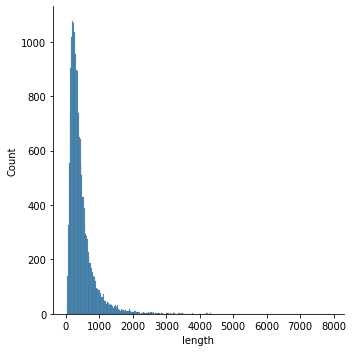

In [33]:
df.head()
df['length'] = df['reviews'].apply(len)
sns.displot(df.length)

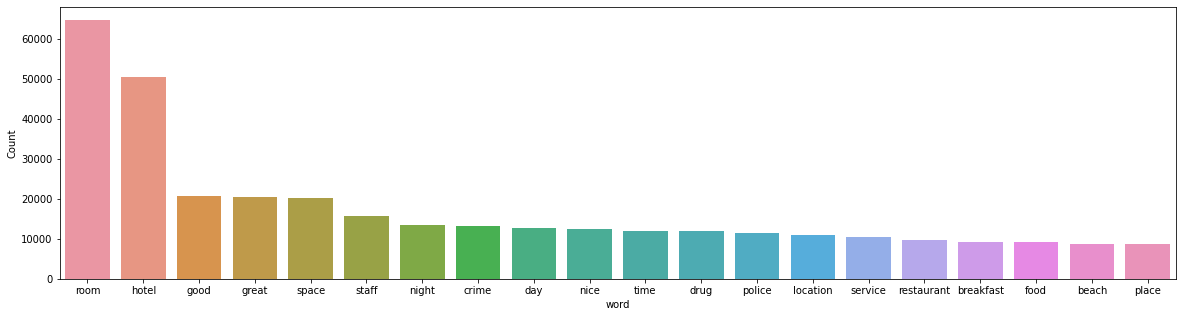

In [34]:
frequent_words(df['reviews'],20)

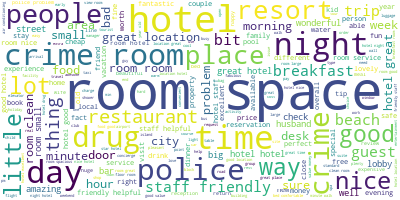

In [32]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['reviews'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [35]:
df.head()

,Review,Rating,reviews,length
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking good deal hotel a...,452
1,nothing special charge diamond member hilton d...,2,special charge diamond member chain 20th anniv...,1154
2,nice rooms not experience hotel monaco seattle...,3,nice room hotel hotel room space large bathroo...,839
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel locatio...,476
4,"great stay great stay, went seahawk game aweso...",5,great great stay awesome downfall crime room s...,816
